# Exploratory Data Analysis of Mr Beast's YouTube Channel

### Intro
YouTube has become an incredible platform for content creators to showcase their work, engage with audiences, and build communities. One prominent figure in the YouTube landscape is Mr Beast, known for his philanthropic stunts, attention-grabbing challenges, and entertaining content.

In this notebook, we will delve into an exploratory analysis of Mr Beast's YouTube channel data. The dataset includes key metrics such as video title, description, duration, view count, like count, comment count, publish date, and publish time. Our goal is to uncover insights and answer several intriguing questions about Mr Beast's content.

1. What is the average duration of Mr Beast's videos in seconds?
2. Which video has the highest view count?
3. What is the correlation between the number of views and the number of likes on Mr Beast's videos?
4. On which day of the week are Mr Beast's videos most commonly published?
5. Is there any correlation between video duration and the number of comments received?
6. What is the distribution of video durations in Mr Beast's channel?
7. Are there any specific words or phrases that commonly appear in video titles that could be linked to higher view counts?

In [1]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer

In [2]:
#data input
data = pd.read_csv("/kaggle/input/mr-beast-youtube-video-statistics/MrBeast_youtube_stats.csv")
data.head(5)

,id,title,description,publishTime,kind_stats,duration_seconds,viewCount,likeCount,commentCount,thumbnails.default.url,...,thumbnails.high.width,thumbnails.high.height,contentDetails.duration,contentDetails.dimension,topicDetails.topicCategories,snippet.defaultLanguage,localizations.en.title,localizations.en.description,snippet.tags,contentDetails.contentRating.ytRating
0,TQHEJj68Jew,I Got Hunted By A Real Bounty Hunter,"Sign up for Current w/ my Creator Code ""BEAST""...",2021-04-24 20:00:00+00:00,youtube#video,861,84717282.0,2876493.0,128922.0,https://i.ytimg.com/vi/TQHEJj68Jew/default.jpg,...,480.0,360.0,PT14M21S,2d,['https://en.wikipedia.org/wiki/Lifestyle_(soc...,NaN,NaN,NaN,NaN,NaN
1,00NgUctWoLQ,"Extreme $1,000,000 Hide And Seek",I didn't expect that to happen at the end I wa...,2021-12-18 21:00:00+00:00,youtube#video,729,32090178.0,2125183.0,73593.0,https://i.ytimg.com/vi/00NgUctWoLQ/default.jpg,...,480.0,360.0,PT12M9S,2d,['https://en.wikipedia.org/wiki/Lifestyle_(soc...,en,"Extreme $1,000,000 Hide And Seek",I didn't expect that to happen at the end I wa...,NaN,NaN
2,NaN,MrBeast,Accomplishments - Raised $20000000 To Plant 20...,2012-02-20 00:43:50+00:00,NaN,0,NaN,NaN,NaN,https://yt3.ggpht.com/ytc/AKedOLTctGKJ32CdDLiS...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,ayXxwJJId_c,I Bought The World&#39;s Largest Mystery Box! ...,I cant believe I spent over $500000 on mystery...,2021-04-03 20:00:01+00:00,youtube#video,709,101745632.0,3110824.0,162796.0,https://i.ytimg.com/vi/ayXxwJJId_c/default.jpg,...,480.0,360.0,PT11M49S,2d,['https://en.wikipedia.org/wiki/Lifestyle_(soc...,NaN,NaN,NaN,NaN,NaN
4,cExLQ1o2pDw,"First To Rob Bank Wins $100,000",I didnt think he would actually rob the bank.....,2021-09-26 20:00:06+00:00,youtube#video,482,50008942.0,2359606.0,120621.0,https://i.ytimg.com/vi/cExLQ1o2pDw/default.jpg,...,480.0,360.0,PT8M2S,2d,['https://en.wikipedia.org/wiki/Lifestyle_(soc...,NaN,NaN,NaN,NaN,NaN


In [3]:
data.shape

(247, 26)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 247 entries, 0 to 246
Data columns (total 26 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     246 non-null    object 
 1   title                                  247 non-null    object 
 2   description                            247 non-null    object 
 3   publishTime                            247 non-null    object 
 4   kind_stats                             246 non-null    object 
 5   duration_seconds                       247 non-null    int64  
 6   viewCount                              246 non-null    float64
 7   likeCount                              244 non-null    float64
 8   commentCount                           245 non-null    float64
 9   thumbnails.default.url                 247 non-null    object 
 10  thumbnails.default.width               246 non-null    float64
 11  thumbn

In [5]:
#data wrangling the date and time data
data['publishTime'] = pd.to_datetime(data['publishTime'])
data['publishDate'] = data['publishTime'].dt.date
data['publishTimestamp'] = data['publishTime'].dt.time

data['publishDay'] = data['publishTime'].dt.day
data['publishMonth'] = data['publishTime'].dt.month
data['publishYear'] = data['publishTime'].dt.year

data['Day_of_Week'] = data['publishTime'].dt.day_name()

data.head(5)

,id,title,description,publishTime,kind_stats,duration_seconds,viewCount,likeCount,commentCount,thumbnails.default.url,...,localizations.en.title,localizations.en.description,snippet.tags,contentDetails.contentRating.ytRating,publishDate,publishTimestamp,publishDay,publishMonth,publishYear,Day_of_Week
0,TQHEJj68Jew,I Got Hunted By A Real Bounty Hunter,"Sign up for Current w/ my Creator Code ""BEAST""...",2021-04-24 20:00:00+00:00,youtube#video,861,84717282.0,2876493.0,128922.0,https://i.ytimg.com/vi/TQHEJj68Jew/default.jpg,...,NaN,NaN,NaN,NaN,2021-04-24,20:00:00,24,4,2021,Saturday
1,00NgUctWoLQ,"Extreme $1,000,000 Hide And Seek",I didn't expect that to happen at the end I wa...,2021-12-18 21:00:00+00:00,youtube#video,729,32090178.0,2125183.0,73593.0,https://i.ytimg.com/vi/00NgUctWoLQ/default.jpg,...,"Extreme $1,000,000 Hide And Seek",I didn't expect that to happen at the end I wa...,NaN,NaN,2021-12-18,21:00:00,18,12,2021,Saturday
2,NaN,MrBeast,Accomplishments - Raised $20000000 To Plant 20...,2012-02-20 00:43:50+00:00,NaN,0,NaN,NaN,NaN,https://yt3.ggpht.com/ytc/AKedOLTctGKJ32CdDLiS...,...,NaN,NaN,NaN,NaN,2012-02-20,00:43:50,20,2,2012,Monday
3,ayXxwJJId_c,I Bought The World&#39;s Largest Mystery Box! ...,I cant believe I spent over $500000 on mystery...,2021-04-03 20:00:01+00:00,youtube#video,709,101745632.0,3110824.0,162796.0,https://i.ytimg.com/vi/ayXxwJJId_c/default.jpg,...,NaN,NaN,NaN,NaN,2021-04-03,20:00:01,3,4,2021,Saturday
4,cExLQ1o2pDw,"First To Rob Bank Wins $100,000",I didnt think he would actually rob the bank.....,2021-09-26 20:00:06+00:00,youtube#video,482,50008942.0,2359606.0,120621.0,https://i.ytimg.com/vi/cExLQ1o2pDw/default.jpg,...,NaN,NaN,NaN,NaN,2021-09-26,20:00:06,26,9,2021,Sunday


In [6]:
#eliminate unused data columns
data = data[['id','title','description','kind_stats','duration_seconds','viewCount','likeCount','commentCount','thumbnails.high.width','thumbnails.high.height','publishYear', 'publishMonth', 'publishDay', 'Day_of_Week','publishTimestamp']]
data.head(5)

,id,title,description,kind_stats,duration_seconds,viewCount,likeCount,commentCount,thumbnails.high.width,thumbnails.high.height,publishYear,publishMonth,publishDay,Day_of_Week,publishTimestamp
0,TQHEJj68Jew,I Got Hunted By A Real Bounty Hunter,"Sign up for Current w/ my Creator Code ""BEAST""...",youtube#video,861,84717282.0,2876493.0,128922.0,480.0,360.0,2021,4,24,Saturday,20:00:00
1,00NgUctWoLQ,"Extreme $1,000,000 Hide And Seek",I didn't expect that to happen at the end I wa...,youtube#video,729,32090178.0,2125183.0,73593.0,480.0,360.0,2021,12,18,Saturday,21:00:00
2,NaN,MrBeast,Accomplishments - Raised $20000000 To Plant 20...,NaN,0,NaN,NaN,NaN,NaN,NaN,2012,2,20,Monday,00:43:50
3,ayXxwJJId_c,I Bought The World&#39;s Largest Mystery Box! ...,I cant believe I spent over $500000 on mystery...,youtube#video,709,101745632.0,3110824.0,162796.0,480.0,360.0,2021,4,3,Saturday,20:00:01
4,cExLQ1o2pDw,"First To Rob Bank Wins $100,000",I didnt think he would actually rob the bank.....,youtube#video,482,50008942.0,2359606.0,120621.0,480.0,360.0,2021,9,26,Sunday,20:00:06


In [7]:
data.shape

(247, 15)

In [8]:
data.isnull().sum()

id                        1
title                     0
description               0
kind_stats                1
duration_seconds          0
viewCount                 1
likeCount                 3
commentCount              2
thumbnails.high.width     1
thumbnails.high.height    1
publishYear               0
publishMonth              0
publishDay                0
Day_of_Week               0
publishTimestamp          0
dtype: int64

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 247 entries, 0 to 246
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      246 non-null    object 
 1   title                   247 non-null    object 
 2   description             247 non-null    object 
 3   kind_stats              246 non-null    object 
 4   duration_seconds        247 non-null    int64  
 5   viewCount               246 non-null    float64
 6   likeCount               244 non-null    float64
 7   commentCount            245 non-null    float64
 8   thumbnails.high.width   246 non-null    float64
 9   thumbnails.high.height  246 non-null    float64
 10  publishYear             247 non-null    int32  
 11  publishMonth            247 non-null    int32  
 12  publishDay              247 non-null    int32  
 13  Day_of_Week             247 non-null    object 
 14  publishTimestamp        247 non-null    ob

### 1. What is the average duration of Mr Beast's videos in seconds?

In [10]:
#average function
average = data['duration_seconds'].mean()
print("The average duration of Mr Beast Videos in seconds: ",average)

The average duration of Mr Beast Videos in seconds:  1886.2348178137652


### 2. Which video has the highest view count?

In [11]:
#find a max value then locate its title
highest_viewcount = data['viewCount'].max()
result = data[data['viewCount'] == highest_viewcount]
distinct_value = result['title'].iloc[0]
print("The video with the highest view count: ",distinct_value)

The video with the highest view count:  $456,000 Squid Game In Real Life!


### 3. What is the correlation between the number of views and the number of likes on Mr Beast's videos?

In [12]:
#generate a correlation matrix
correlation = round((data['viewCount'].corr(data['likeCount']))*100,2)
print(f"Correlation between number of views and likes: {correlation}%")

Correlation between number of views and likes: 69.14%


### 4. On which day of the week are Mr Beast's videos most commonly published?

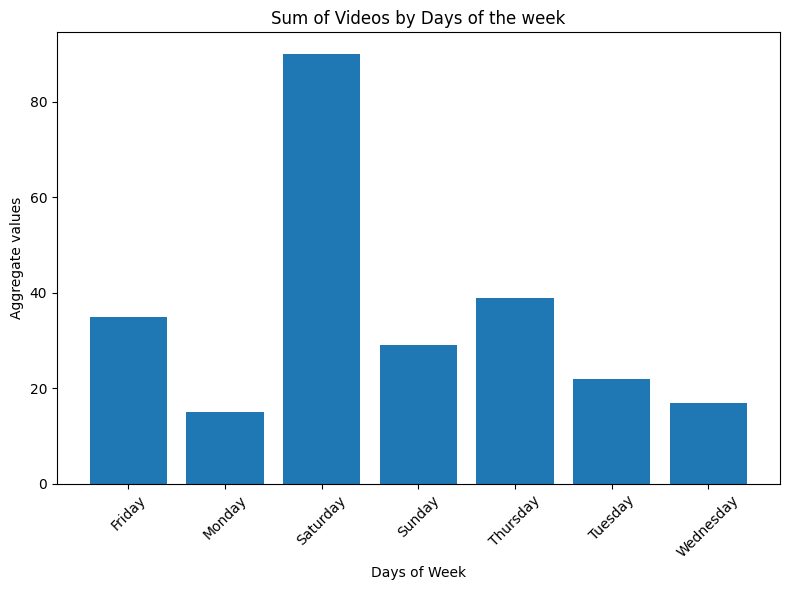

In [13]:
#count views based on aggregated day of the week values
sum_values = data.groupby('Day_of_Week')['title'].count().reset_index()

#generate a graph
plt.figure(figsize=(8, 6))
plt.bar(sum_values['Day_of_Week'], sum_values['title'])
plt.xlabel('Days of Week')
plt.ylabel('Aggregate values')
plt.title('Sum of Videos by Days of the week')
plt.xticks(rotation=45)  
plt.tight_layout()
plt.show()

### 5. Is there any correlation between video duration and the number of comments received?

In [14]:
#generate a correlation matrix
correlation = round((data['duration_seconds'].corr(data['commentCount']))*100,2)
print(f"Correlation between video duration and the number of comments received: {correlation}%")

Correlation between video duration and the number of comments received: 3.28%


### 6. What is the distribution of video durations in Mr Beast's channel?

<Axes: >

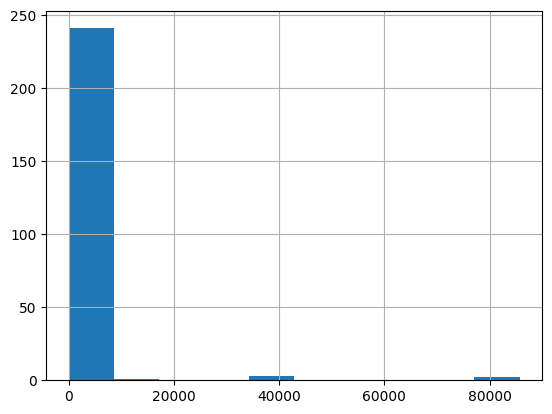

In [15]:
#generate a histogram
data['duration_seconds'].hist()

### 7. Are there any specific words or phrases that commonly appear in video titles that could be linked to higher view counts?

In [16]:
#tokenize and count word frequencies
vectorizer = CountVectorizer(stop_words='english')
word_counts = vectorizer.fit_transform(data['title'])
word_freq = pd.DataFrame(word_counts.toarray(), columns=vectorizer.get_feature_names_out())

#add 'View_Count' to word frequencies DataFrame
word_freq['viewCount'] = data['viewCount']

#calculate correlations
correlations = word_freq.corr()['viewCount']

#sort correlations in descending order to find words/phrases with higher correlation
sorted_correlations = correlations.drop('viewCount').sort_values(ascending=False)
sorted_correlations.head(10)

hours          0.294855
50             0.286350
456            0.285641
squid          0.285641
24             0.240863
confinement    0.240224
solitary       0.240224
spent          0.236918
win            0.196410
game           0.185743
Name: viewCount, dtype: float64